Prepare and modify figures for paper.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

#plt.style.use('ggplot')
plt.style.use('seaborn-colorblind')
#plt.style.use('dark_background')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.transparent'] = True

%matplotlib inline

import datetime
date = datetime.datetime.now().strftime('%Y%m%d')

# Data distribution
Adopted from build_models_07.ipynb.

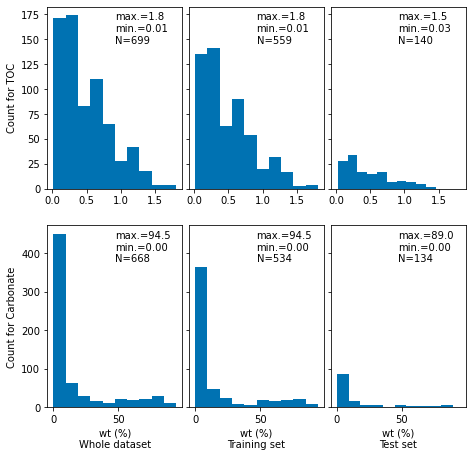

In [17]:
from sklearn.model_selection import train_test_split

fig, axes = plt.subplots(2, 3, sharex='row', sharey='row', figsize=(7.5, 7))
merge_df = pd.read_csv('data/spe+bulk_dataset_20201215.csv', index_col=0)
ca_df = merge_df[merge_df.core != 'SO178-12-3'] # This core doesn't have CaCO3 measurement

toc_y_train, toc_y_test = train_test_split(merge_df['TOC%'].values, test_size = 0.2, shuffle = True, random_state = 24)
ca_y_train, ca_y_test = train_test_split(ca_df['CaCO3%'].values, test_size = 0.2, shuffle = True, random_state = 24)


    #ax.set_xlabel('wt (%)\n{}'.format(label))
    
for ax, y, label in zip(axes[0, :], [merge_df['TOC%'], toc_y_train, toc_y_test], ['Whole dataset', 'Training set', 'Test set']):
    ax.hist(y)
    ax.text(0.5, 0.8, "max.={:.1f}\nmin.={:.2f}\nN={}".format(
        np.max(y), np.min(y), len(y)), transform=ax.transAxes)
    
for ax, y, label in zip(axes[1, :], [ca_df['CaCO3%'], ca_y_train, ca_y_test], ['Whole dataset', 'Training set', 'Test set']):
    ax.hist(y)
    ax.text(0.5, 0.8, "max.={:.1f}\nmin.={:.2f}\nN={}".format(
        np.max(y), np.min(y), len(y)), transform=ax.transAxes)
    ax.set_xlabel('wt (%)\n{}'.format(label))

axes[0, 0].set_ylabel('Count for TOC')
axes[1, 0].set_ylabel('Count for Carbonate')


fig.subplots_adjust(wspace=.05, top=.92)
fig.savefig('results/data_hist_{}.png'.format(date))

In [19]:
np.unique(merge_df.core)

array(['LV28-44-3', 'LV29-114-3', 'SO178-12-3', 'SO264-13-2',
       'SO264-15-2', 'SO264-28-2', 'SO264-55-1', 'SO264-56-2',
       'SO264-64-1', 'SO264-66-2'], dtype=object)

In [18]:
merge_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2043,2044,2045,2046,2047,TC%,TOC%,CaCO3%,core,mid_depth_mm
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.542079,0.394127,17.898887,SO264-64-1,115.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.247150,0.611208,13.632300,SO264-64-1,215.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.710588,0.523402,1.559822,SO264-64-1,305.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.562171,0.472551,0.746802,SO264-64-1,1015.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.578167,0.312852,2.210866,SO264-64-1,1815.0


## Show data distribution of each step

### Build datasets

In [7]:
merge_df = pd.read_csv('data/spe+bulk_dataset_20201215.csv', index_col=0)
merge_df.core.unique()

array(['SO264-64-1', 'SO264-66-2', 'SO264-56-2', 'SO264-28-2',
       'SO264-55-1', 'SO264-15-2', 'SO264-13-2', 'LV28-44-3',
       'LV29-114-3', 'SO178-12-3'], dtype=object)

In [3]:
from sklearn.model_selection import train_test_split

#merge_df = pd.read_csv('data/spe+bulk_dataset_20201215.csv', index_col=0)
SO264_core = merge_df.core.unique()[:-3]
scale_1_df = merge_df[merge_df.core.isin(SO264_core)].copy()
scale_2_ca = merge_df.loc[merge_df.core.isin(['LV28-44-3', 'LV29-114-3']), 'CaCO3%']
scale_2_toc = merge_df.loc[merge_df.core.isin(['LV28-44-3', 'LV29-114-3', 'SO178-12-3']), 'TOC%']


s1_toc_train, s1_toc_test, s1_ca_train, s1_ca_test = train_test_split(scale_1_df['TOC%'].values, scale_1_df['CaCO3%'].values, test_size = 0.2, shuffle = True, random_state = 24)
s2_toc_train, s2_toc_test = train_test_split(scale_2_toc, test_size = 0.2, shuffle = True, random_state = 24)
s2_ca_train, s2_ca_test = train_test_split(scale_2_ca, test_size = 0.2, shuffle = True, random_state = 24)

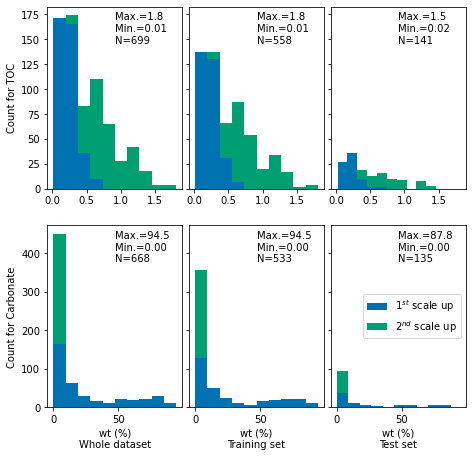

In [8]:
fig, axes = plt.subplots(2, 3, sharex='row', sharey='row', figsize=(7.5, 7))

# TOC    
for ax, s1, s2 in zip(axes[0, :], [scale_1_df['TOC%'], s1_toc_train, s1_toc_test], 
                             [scale_2_toc, s2_toc_train, s2_toc_test]):
    y = np.hstack((s1, s2))
    ax.hist([s1, s2], stacked=True)
    ax.text(0.5, 0.8, "Max.={:.1f}\nMin.={:.2f}\nN={}".format(
        np.max(y), np.min(y), len(y)), transform=ax.transAxes)
    
#Carbonate
for ax, s1, s2, label in zip(axes[1, :], [scale_1_df['CaCO3%'], s1_ca_train, s1_ca_test], 
                             [scale_2_ca, s2_ca_train, s2_ca_test], ['Whole dataset', 'Training set', 'Test set']):
    y = np.hstack((s1, s2))
    ax.hist([s1, s2], stacked=True, label=['1$^{st}$ scale up', '2$^{nd}$ scale up'])
    ax.text(0.5, 0.8, "Max.={:.1f}\nMin.={:.2f}\nN={}".format(
        np.max(y), np.min(y), len(y)), transform=ax.transAxes)
    ax.set_xlabel('wt (%)\n{}'.format(label))

axes[0, 0].set_ylabel('Count for TOC')
axes[1, 0].set_ylabel('Count for Carbonate')
axes[1, 2].legend(loc='center right')

fig.subplots_adjust(wspace=.05, top=.92)
fig.savefig('results/data_hist_s1+2_{}.png'.format(date))

In [9]:
s1_toc = {'max': [], 'min': [], 'N':[]}
s1_ca = {'max': [], 'min': [], 'N':[]}
s2_toc = {'max': [], 'min': [], 'N':[]}
s2_ca = {'max': [], 'min': [], 'N':[]}

cols = []

for s, label, values in zip([s1_toc, s1_ca, s2_toc, s2_ca], ['s1_toc', 's1_ca', 's2_toc', 's2_ca'], [[scale_1_df['TOC%'], s1_toc_train, s1_toc_test], 
                                                                                                     [scale_1_df['CaCO3%'], s1_ca_train, s1_ca_test],
                                                                                                     [scale_2_toc, s2_toc_train, s2_toc_test],
                                                                                                     [scale_2_ca, s2_ca_train, s2_ca_test]]):
    for value, dataset in zip(values, ['whole', 'train', 'test']):
        s['max'].append(np.max(value))
        s['min'].append(np.min(value))
        s['N'].append(len(value))
        cols.append('{}_{}'.format(label, dataset))

In [10]:
data_info = pd.concat(
    [pd.DataFrame(s1_toc).T, pd.DataFrame(s1_ca).T, pd.DataFrame(s2_toc).T, pd.DataFrame(s2_ca).T],
     join='outer', axis=1
)
data_info.columns = cols
data_info

,s1_toc_whole,s1_toc_train,s1_toc_test,s1_ca_whole,s1_ca_train,s1_ca_test,s2_toc_whole,s2_toc_train,s2_toc_test,s2_ca_whole,s2_ca_train,s2_ca_test
max,0.715612,0.715612,0.663723,94.487199,94.487199,87.822175,1.8085,1.8085,1.4635,7.77,7.77,4.49982
min,0.014449,0.014449,0.023633,0.009081,0.009081,0.090807,0.3130,0.3130,0.3425,0.00,0.00,0.00000
N,382.000000,305.000000,77.000000,382.000000,305.000000,77.000000,317.0000,253.0000,64.0000,286.00,228.00,58.00000


In [23]:
data_info.to_csv('results/data_distribution_{}.csv'.format(date))

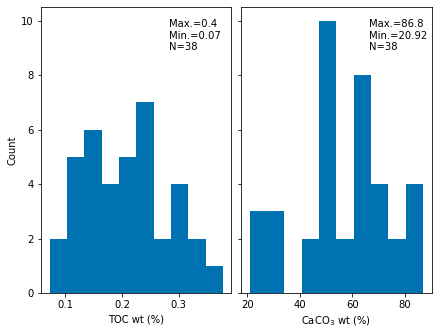

In [12]:
fig, axes =  plt.subplots(1, 2, figsize=(7, 5), sharey='row')

for ax, analyte in zip(axes, ['TOC%', 'CaCO3%']):
    y = merge_df.loc[merge_df.core == 'SO264-15-2', analyte]
    ax.hist(y)
    ax.text(0.67, 0.85, "Max.={:.1f}\nMin.={:.2f}\nN={}".format(
        np.max(y), np.min(y), len(y)), transform=ax.transAxes)


axes[0].set_xlabel('TOC wt (%)')
axes[1].set_xlabel('CaCO$_{3}$ wt (%)')
axes[0].set_ylabel('Count')
fig.subplots_adjust(wspace=.05, top=.92)
fig.savefig('results/data_hist_pilot_{}.png'.format(date))